In [1]:
import pandas as pd
from pandas import Series,DataFrame

In [2]:
titanic_df = pd.read_csv("train.csv")

In [5]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [3]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

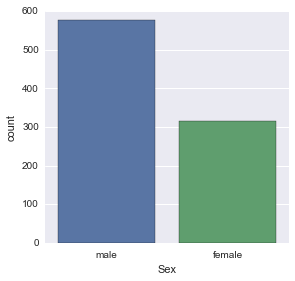

In [8]:
sns.factorplot('Sex',data=titanic_df,kind='count')

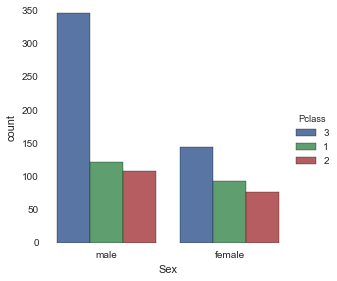

In [10]:
sns.factorplot('Sex',data=titanic_df,kind='count',hue='Pclass')

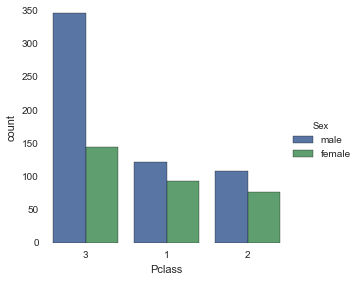

In [10]:
sns.factorplot('Pclass',data=titanic_df,kind='count',hue='Sex')

In [30]:
def male_female_child(passanger):
    age,sex = passanger
    
    if age < 16:
        if sex == 'male':
            return 'boy'
        else:
            return 'girl'
    else:
        return sex

In [31]:
titanic_df['person'] = titanic_df[['Age','Sex']].apply(male_female_child,axis=1)

In [32]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male


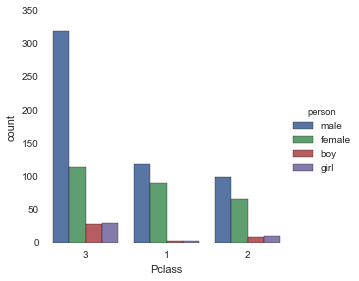

In [14]:
sns.factorplot('Pclass',data=titanic_df,kind='count',hue='person')

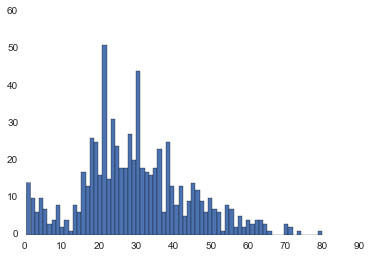

In [15]:
titanic_df['Age'].hist(bins=70)

In [26]:
titanic_df['Age'].mean()

29.69911764705882

In [27]:
titanic_df['person'].value_counts()

male      537
female    271
girl       43
boy        40
dtype: int64

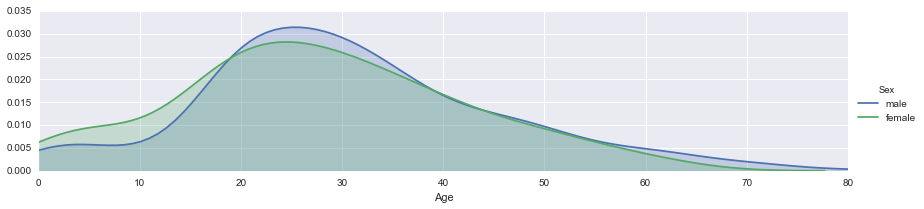

In [16]:
fig = sns.FacetGrid(titanic_df,hue='Sex',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()


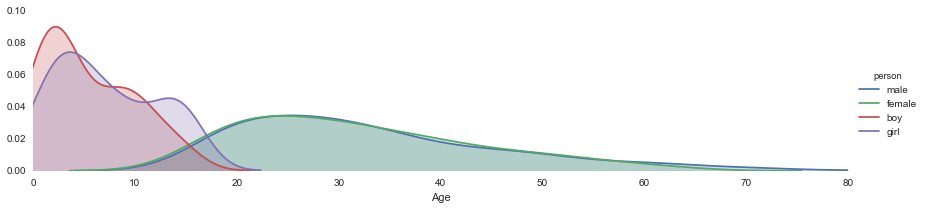

In [18]:
fig = sns.FacetGrid(titanic_df,hue='person',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

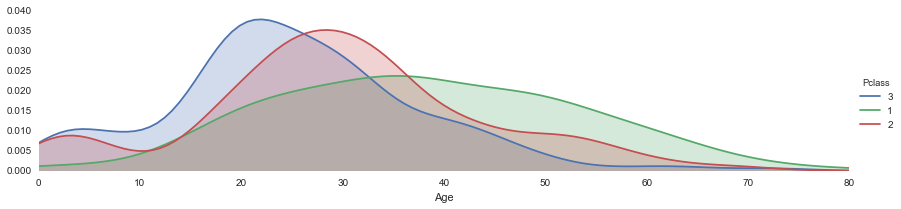

In [21]:
fig = sns.FacetGrid(titanic_df,hue='Pclass',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

In [22]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male


In [18]:
deck = titanic_df['Cabin'].dropna()

In [19]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

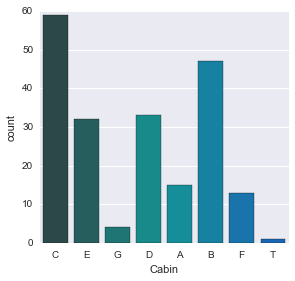

In [25]:
levels = []
for level in deck:
    levels.append(level[0])
    
cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']
sns.factorplot('Cabin',data=cabin_df,palette='winter_d',kind='count')
#cabin_df

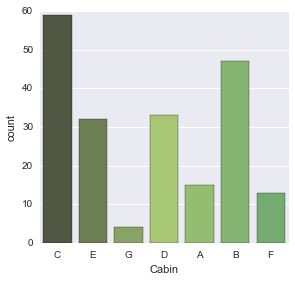

In [28]:
cabin_df=cabin_df[cabin_df.Cabin != 'T']

sns.factorplot('Cabin',data=cabin_df,palette='summer_d',kind ='count')

In [33]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male


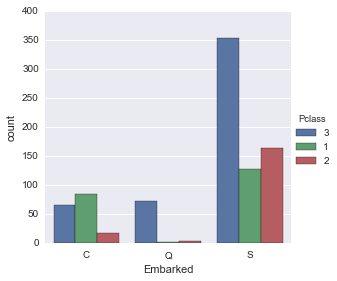

In [41]:
sns.factorplot('Embarked',data=titanic_df,hue='Pclass',order=['C','Q','S'],kind='count')

In [42]:
#Who was alone and who was with family

In [43]:
titanic_df['Alone']=titanic_df.SibSp+titanic_df.Parch

In [44]:
titanic_df['Alone'].head()

0    1
1    1
2    0
3    1
4    0
Name: Alone, dtype: int64

In [46]:
titanic_df['Alone'].loc[titanic_df['Alone'] >0] = 'With Family'

In [48]:
titanic_df['Alone'].loc[titanic_df['Alone'] == 0] = 'Alone'

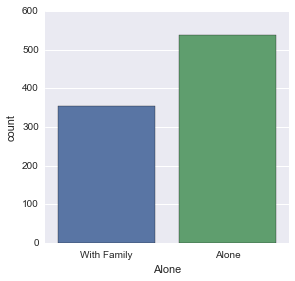

In [54]:
sns.factorplot('Alone',data=titanic_df,kind='count')

In [56]:
titanic_df['Survivor']=titanic_df.Survived.map({0:'no',1:'yes'})

In [57]:
titanic_df.Survivor.head()

0     no
1    yes
2    yes
3    yes
4     no
Name: Survivor, dtype: object

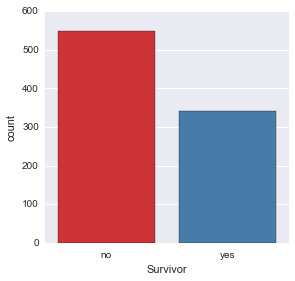

In [62]:
sns.factorplot('Survivor',data=titanic_df,kind='count',palette='Set1')

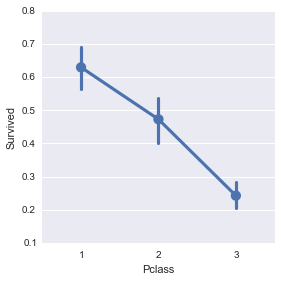

In [68]:
sns.factorplot('Pclass','Survived',data=titanic_df,order=[1,2,3])

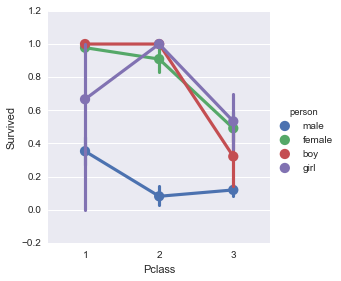

In [75]:
sns.factorplot('Pclass','Survived',data=titanic_df,order=[1,2,3],hue='person')

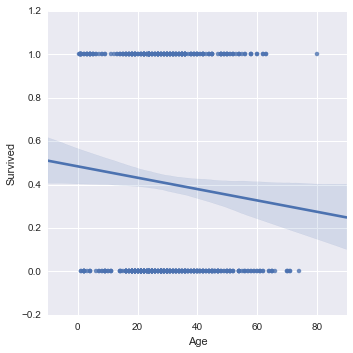

In [76]:
sns.lmplot('Age','Survived',data=titanic_df)

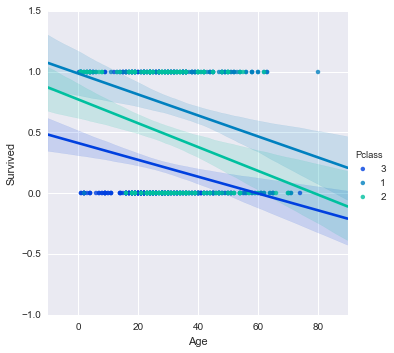

In [77]:
sns.lmplot('Age','Survived',data=titanic_df,hue='Pclass',palette='winter')

In [78]:
generations = [10,20,30,40,60,80]

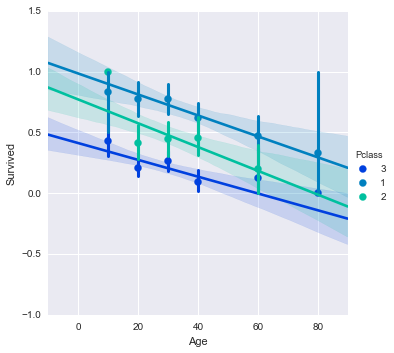

In [83]:
sns.lmplot('Age','Survived',data=titanic_df,hue='Pclass',palette='winter',x_bins=generations)

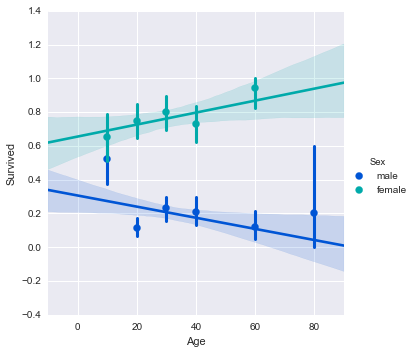

In [84]:
sns.lmplot('Age','Survived',data=titanic_df,hue='Sex',palette='winter',x_bins=generations)

In [87]:
generations = [1,5,10,20,30,40,50,60,70,80]

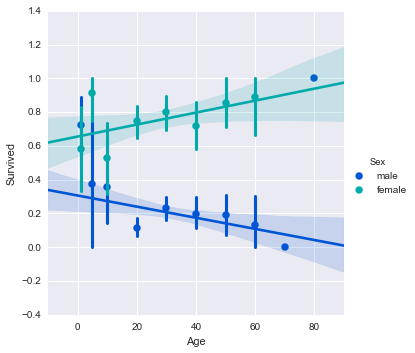

In [88]:
sns.lmplot('Age','Survived',data=titanic_df,hue='Sex',palette='winter',x_bins=generations)

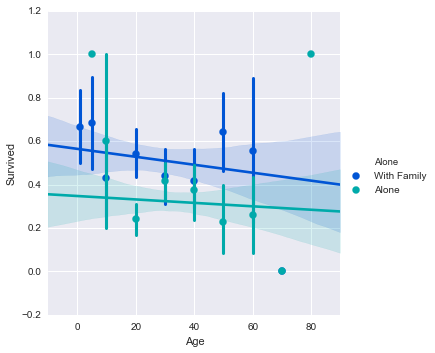

In [92]:
sns.lmplot('Age','Survived',data=titanic_df,hue='Alone',palette='winter',x_bins=generations)

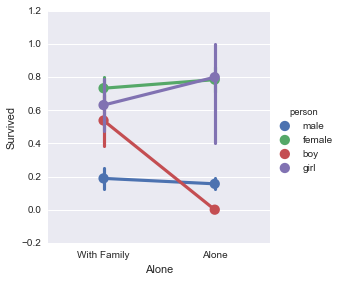

In [95]:
sns.factorplot('Alone','Survived',data=titanic_df,hue='person')
#Does being alone/with family affect the survival rate!

In [98]:
titanic_df['Cabin'] = titanic_df['Cabin'].fillna('Unknown')

In [99]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,Unknown,S,male,With Family,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female,With Family,yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,Unknown,S,female,Alone,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female,With Family,yes
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,Unknown,S,male,Alone,no


In [100]:
titanic_df['Deck'] = titanic_df['Cabin'].str[:1]

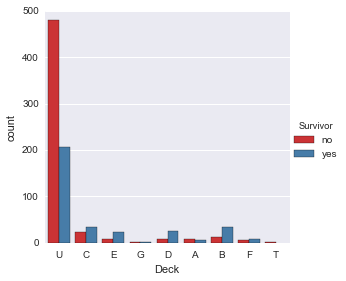

In [112]:
sns.factorplot('Deck',data=titanic_df,kind='count',palette='Set1',hue='Survivor')
#Does the deck affect survival!

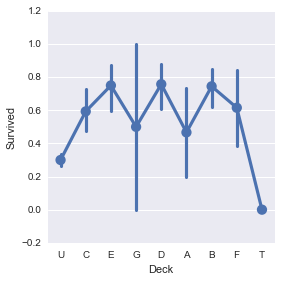

In [110]:
sns.factorplot('Deck','Survived',data=titanic_df)
#Does being alone/with family affect the survival rate!